# Convert .xml to pianoroll representation (pr)

conv .xml -> np (pianoroll) for 4 voices + 1 mix of all voices -> save with pickle 

folder structure: pianorolls -> voice_0 ,voice_1, voice_2, voice_3, voice_all -> voice_0_001.pkl 

### original conversion from humdrum to xml (in terminal)

In [232]:
#for FILE in *; do hum2xml -r $FILE > "${FILE%.*}.xml"; done

## Convert xml to pr for 1 file

In [283]:
import partitura 
import numpy as np
import os
import pickle

In [284]:
name = "chor066.xml"


import_path = os.path.join("/Users/sayang/Masterproject/chorales_converted", name)
part = partitura.load_musicxml(import_path)

In [285]:
### Seperate the 4 different voices ####

part_zero = part[0]
part_one = part[1]
part_two = part[2]
part_three = part[3]

In [286]:
### Visualize the different voices ###

#print(part_one.pretty())   
#partitura.render(part_one) #still doesnt work

In [287]:
onset_beat_0 = partitura.utils.note_array_from_part(part_zero)['onset_beat'][-1]
duration_beat_0 = partitura.utils.note_array_from_part(part_zero)['duration_beat'][-1]
beat_0 = onset_beat_0 + duration_beat_0

onset_beat_1 = partitura.utils.note_array_from_part(part_one)['onset_beat'][-1]
duration_beat_1 = partitura.utils.note_array_from_part(part_one)['duration_beat'][-1]
beat_1 = onset_beat_1 + duration_beat_1

onset_beat_2 = partitura.utils.note_array_from_part(part_two)['onset_beat'][-1]
duration_beat_2 = partitura.utils.note_array_from_part(part_two)['duration_beat'][-1]
beat_2 = onset_beat_2 + duration_beat_2

onset_beat_3 = partitura.utils.note_array_from_part(part_three)['onset_beat'][-1]
duration_beat_3 = partitura.utils.note_array_from_part(part_three)['duration_beat'][-1]
beat_3 = onset_beat_3 + duration_beat_3

onset_beat = partitura.utils.ensure_notearray(part)['onset_beat'][-1]
duration_beat = partitura.utils.ensure_notearray(part)['duration_beat'][-1]
beat_all = onset_beat + duration_beat


In [288]:
"""
onset_div = partitura.utils.note_array_from_part(part_zero)['onset_div'][-1]
duration_div = partitura.utils.note_array_from_part(part_zero)['duration_div'][-1]
div = onset_div + duration_div

beat_0_div = part_zero.beat_map
position_in_beat = beat_0_div(div).item()
position_in_beat
"""

"\nonset_div = partitura.utils.note_array_from_part(part_zero)['onset_div'][-1]\nduration_div = partitura.utils.note_array_from_part(part_zero)['duration_div'][-1]\ndiv = onset_div + duration_div\n\nbeat_0_div = part_zero.beat_map\nposition_in_beat = beat_0_div(div).item()\nposition_in_beat\n"

In [289]:
### maybe use time_uni = beat and time_div =12
### Convert every voice into a pianoroll numpy array ###

pr_zero = partitura.utils.compute_pianoroll(part_zero, time_unit = "beat",time_div = 12,piano_range=True,remove_silence=False,end_time=beat_0)
pr_zero = pr_zero.toarray()

pr_one = partitura.utils.compute_pianoroll(part_one, time_unit = "beat",time_div = 12,piano_range=True,remove_silence=False,end_time=beat_1)
pr_one = pr_one.toarray()

pr_two = partitura.utils.compute_pianoroll(part_two, time_unit = "beat",time_div = 12,piano_range=True,remove_silence=False,end_time=beat_2)
pr_two = pr_two.toarray()

pr_three = partitura.utils.compute_pianoroll(part_three, time_unit = "beat",time_div = 12,piano_range=True,remove_silence=False,end_time=beat_3)
pr_three = pr_three.toarray()

pr = partitura.utils.compute_pianoroll(part, time_unit = "beat",time_div = 12,piano_range=True,remove_silence=False,end_time=beat_all)
pr = pr.toarray()

In [290]:
"""
pr_zero = partitura.utils.compute_pianoroll(part_zero, time_unit = "beat",time_div = 12)
pr_zero = pr_zero.toarray()

pr_one = partitura.utils.compute_pianoroll(part_one, time_unit = "beat",time_div = 12)
pr_one = pr_one.toarray()

pr_two = partitura.utils.compute_pianoroll(part_two, time_unit = "beat",time_div = 12)
pr_two = pr_two.toarray()

pr_three = partitura.utils.compute_pianoroll(part_three, time_unit = "beat",time_div = 12)
pr_three = pr_three.toarray()

pr = partitura.utils.compute_pianoroll(part, time_unit = "beat",time_div = 12)
pr = pr.toarray()
"""

'\npr_zero = partitura.utils.compute_pianoroll(part_zero, time_unit = "beat",time_div = 12)\npr_zero = pr_zero.toarray()\n\npr_one = partitura.utils.compute_pianoroll(part_one, time_unit = "beat",time_div = 12)\npr_one = pr_one.toarray()\n\npr_two = partitura.utils.compute_pianoroll(part_two, time_unit = "beat",time_div = 12)\npr_two = pr_two.toarray()\n\npr_three = partitura.utils.compute_pianoroll(part_three, time_unit = "beat",time_div = 12)\npr_three = pr_three.toarray()\n\npr = partitura.utils.compute_pianoroll(part, time_unit = "beat",time_div = 12)\npr = pr.toarray()\n'

In [291]:
### print the shape of the np arrays ###
print(pr_zero.shape)
print(pr_one.shape)
print(pr_two.shape)
print(pr_three.shape)
print(pr.shape)

(88, 672)
(88, 672)
(88, 672)
(88, 672)
(88, 672)


In [292]:
### See if the sum of the individual represenations are exaclty the same as the original ###
### - if not set all values bigger than 1 to 1 again ###

print(np.sum(pr_zero))
print(np.sum(pr_one))
print(np.sum(pr_two))
print(np.sum(pr_three))

print("sum of all 4 voice:", np.sum(pr_zero+pr_one+pr_two+pr_three))
print("sum of mixed pr representation:",np.sum(pr))

672
672
672
672
sum of all 4 voice: 2688
sum of mixed pr representation: 2664


## set all values > 1 in the composition of the 4 seperate voices to 1 ###



In [293]:
pr_comp = pr_zero+pr_one+pr_two+pr_three
pr_comp =  np.where(pr_comp < 1 , pr_comp, 1) 

quick check:

In [294]:
np.where(np.sum(pr,axis=0)!=np.sum(pr_comp,axis=0))

(array([402, 403, 404, 405, 406, 407]),)

In [295]:
position= 407

In [296]:
np.where(pr_zero[:,402]==1),np.where(pr_one[:,position]==1),np.where(pr_two[:,position]==1),np.where(pr_three[:,position]==1), np.where(pr_comp[:,position]==1)

((array([36]),),
 (array([34]),),
 (array([43]),),
 (array([51]),),
 (array([34, 36, 43, 51]),))

In [312]:
np.where((pr_zero+pr_one+pr_two+pr_three)[:,position]!=0)

(array([34, 36, 43, 51]),)

In [310]:
np.where(pr[:,position]==1)

(array([34, 36, 43]),)

In [299]:
np.sum(pr,axis=0).shape

(672,)

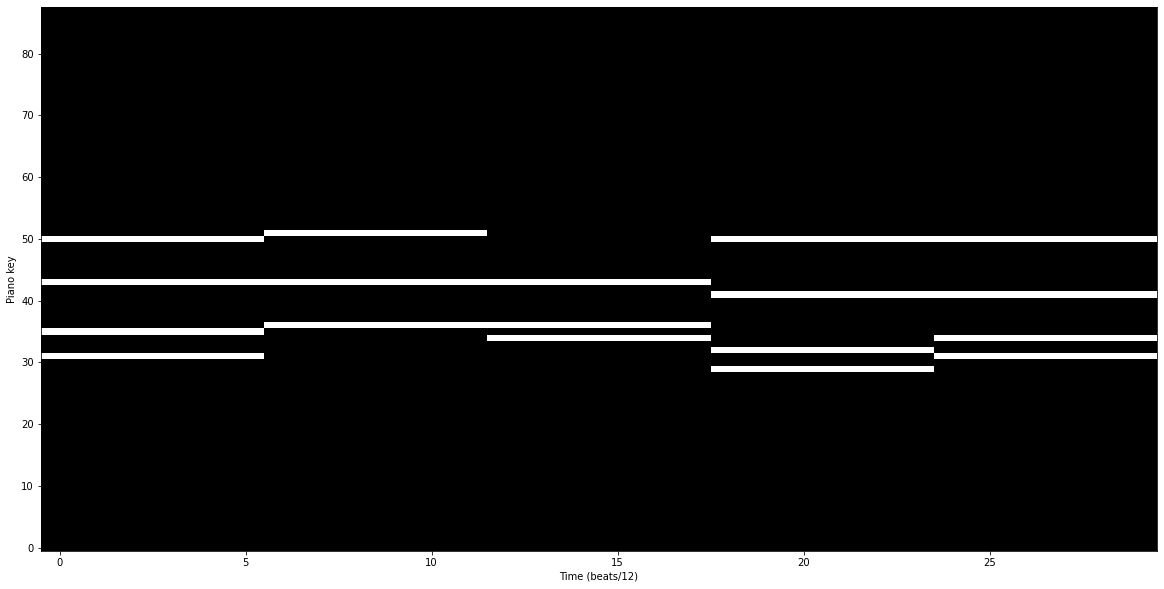

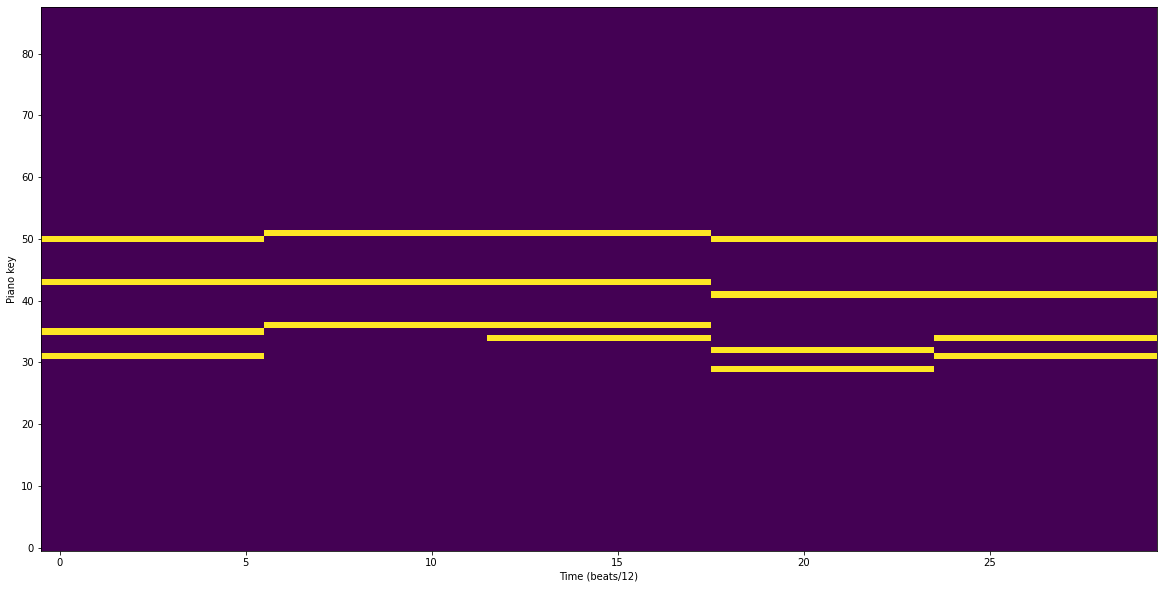

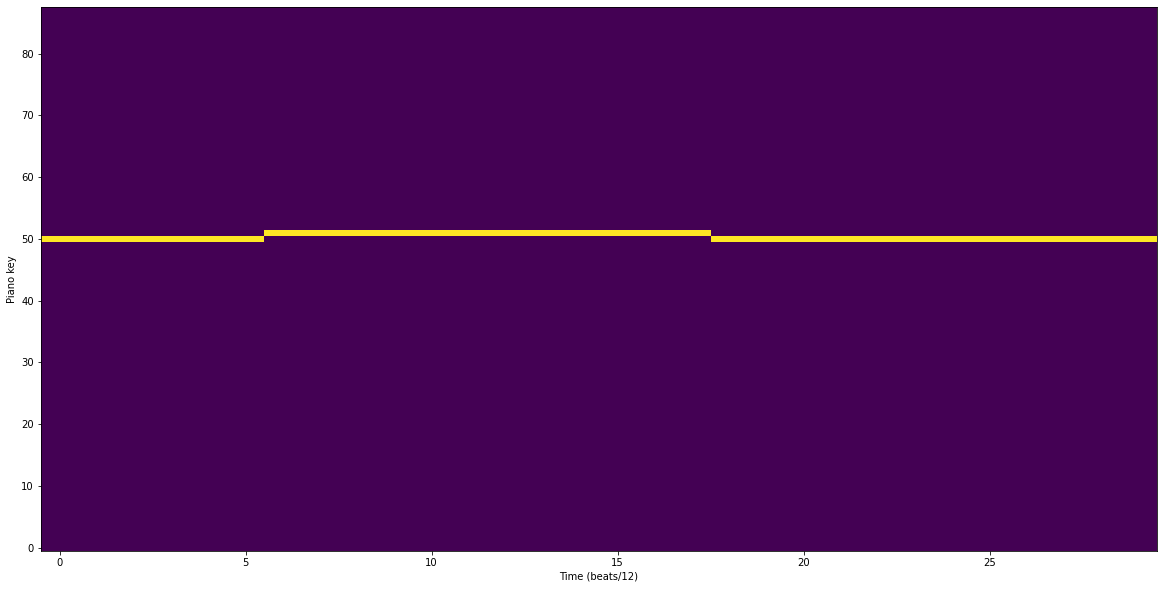

In [316]:
piano_range = True
time_unit = 'beat'
time_div = 12

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.imshow(pr[:,390:420], origin="lower", cmap='gray', interpolation='nearest', aspect='auto')
ax.set_xlabel(f'Time ({time_unit}s/{time_div})')
ax.set_ylabel('Piano key' if piano_range else 'MIDI pitch')
plt.show()

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.imshow(pr_comp[:,390:420], origin="lower", interpolation='nearest', aspect='auto')
ax.set_xlabel(f'Time ({time_unit}s/{time_div})')
ax.set_ylabel('Piano key' if piano_range else 'MIDI pitch')
plt.show()

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.imshow(pr_three[:,390:420], origin="lower", interpolation='nearest', aspect='auto')
ax.set_xlabel(f'Time ({time_unit}s/{time_div})')
ax.set_ylabel('Piano key' if piano_range else 'MIDI pitch')
plt.show()

In [301]:
np.sum(pr_comp,axis=0) 

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [281]:
print( np.sum(pr_comp) == np.sum(pr))

True


## save the data   

save every voice in a seperate folder as well as mixed representation the naming scheme is 
 e.g. pianoroll/voice_0/voice_0_371.pkl

In [218]:
#example
os.path.join("pianoroll_88", voice_folder[0], name)

'pianoroll_88/voice_0/chor283.xml'

In [215]:
file_out_names = [ "voice_0_" + name[4:7]+ ".pkl" , "voice_1_" + name[4:7] + ".pkl" , "voice_2_" + name[4:7] , "voice_3_" + name[4:7] + ".pkl", "voice_all_" + name[4:7]+".pkl"   ]

In [219]:
voice_folder = ["voice_0","voice_1","voice_2","voice_3","voice_all"]
pianorolls = [pr_zero,pr_one,pr_two,pr_three,pr]


for n,i in enumerate(pianorolls):
    a_folder = voice_folder[n]
    a_file = file_out_names[n]
    joined_path = os.path.join("pianoroll_88", a_folder, a_file)
    with open(joined_path, 'wb') as f:
        pickle.dump(i, f)

## test - loading pickle file again

In [220]:
with open("pianoroll_88/voice_0/voice_0_283.pkl",'rb') as f:
    loaded_obj = pickle.load(f)
    print(loaded_obj.shape)

(88, 672)


# Now do this for the whole folder

In [320]:
path = "/Users/sayang/Masterproject/chorales_converted"

for filename in os.listdir(path):
    if not filename.endswith('.xml'): continue
    fullname = os.path.join(path, filename)
    part = partitura.load_musicxml(fullname)
        
    part_zero = part[0]
    part_one = part[1]
    part_two = part[2]
    part_three = part[3]
    
    
    onset_beat_0 = partitura.utils.note_array_from_part(part_zero)['onset_beat'][-1]
    duration_beat_0 = partitura.utils.note_array_from_part(part_zero)['duration_beat'][-1]
    beat_0 = onset_beat_0 + duration_beat_0

    onset_beat_1 = partitura.utils.note_array_from_part(part_one)['onset_beat'][-1]
    duration_beat_1 = partitura.utils.note_array_from_part(part_one)['duration_beat'][-1]
    beat_1 = onset_beat_1 + duration_beat_1

    onset_beat_2 = partitura.utils.note_array_from_part(part_two)['onset_beat'][-1]
    duration_beat_2 = partitura.utils.note_array_from_part(part_two)['duration_beat'][-1]
    beat_2 = onset_beat_2 + duration_beat_2

    onset_beat_3 = partitura.utils.note_array_from_part(part_three)['onset_beat'][-1]
    duration_beat_3 = partitura.utils.note_array_from_part(part_three)['duration_beat'][-1]
    beat_3 = onset_beat_3 + duration_beat_3
    
    onset_beat = partitura.utils.ensure_notearray(part)['onset_beat'][-1]
    duration_beat = partitura.utils.ensure_notearray(part)['duration_beat'][-1]
    beat_all = onset_beat + duration_beat

    pr_zero = partitura.utils.compute_pianoroll(part_zero, time_unit = "beat",time_div = 12,piano_range=True,remove_silence=False,end_time=beat_0)
    pr_zero = pr_zero.toarray()

    pr_one = partitura.utils.compute_pianoroll(part_one, time_unit = "beat",time_div = 12,piano_range=True,remove_silence=False,end_time=beat_1)
    pr_one = pr_one.toarray()

    pr_two = partitura.utils.compute_pianoroll(part_two, time_unit = "beat",time_div = 12,piano_range=True,remove_silence=False,end_time=beat_2)
    pr_two = pr_two.toarray()

    pr_three = partitura.utils.compute_pianoroll(part_three, time_unit = "beat",time_div = 12,piano_range=True,remove_silence=False,end_time=beat_3)
    pr_three = pr_three.toarray()

    pr = partitura.utils.compute_pianoroll(part, time_unit = "beat",time_div = 12,piano_range=True,remove_silence=False,end_time=beat_all)
    pr = pr.toarray()
    
    if pr_zero.shape == pr_one.shape == pr_two.shape == pr_three.shape:# == pr.shape : 
        #pr_comp = pr_zero+pr_one+pr_two+pr_three
        #pr_comp =  np.where(pr_comp < 1 , pr_comp, 1) 
        
        
        file_out_names = [ "voice_0_" + filename[4:7]+ ".pkl" , "voice_1_" + filename[4:7] + ".pkl" , "voice_2_" + filename[4:7] + ".pkl", "voice_3_" + filename[4:7] + ".pkl", "voice_all_" + filename[4:7]+".pkl"   ]    
        voice_folder = ["voice_0","voice_1","voice_2","voice_3","voice_all"]
        pianorolls = [pr_zero,pr_one,pr_two,pr_three,pr_comp]


        for n,i in enumerate(pianorolls):
            a_folder = voice_folder[n]
            a_file = file_out_names[n]
            joined_path = os.path.join("pianoroll_88", a_folder, a_file)
            #if a_file not in  ["chor133.xml", "chor043.xml", "chor283.xml"]:
            with open(joined_path, 'wb') as f:
                pickle.dump(i, f)   

                
    else:
        print("shapes dont match:",filename)

# Test pr col size by loading 2 measure piece in 4/4 with random notes

In [33]:
name = "test2.musicxml"

import_path = os.path.join("/Users/sayang/Masterproject", name)
part_group = partitura.load_musicxml(import_path)
#print(part)
part = part_group.children[0]

In [34]:
test123 = partitura.utils.compute_pianoroll(part, time_unit = "beat",time_div = 12)
test123 = test123.toarray()
test123.shape

(128, 72)

In [31]:
part.note_array

array([(0., 1., 0., 1., 0, 1, 70, 1, 'None'),
       (4., 1., 4., 1., 4, 1, 74, 1, 'None')],
      dtype=[('onset_beat', '<f4'), ('duration_beat', '<f4'), ('onset_quarter', '<f4'), ('duration_quarter', '<f4'), ('onset_div', '<i4'), ('duration_div', '<i4'), ('pitch', '<i4'), ('voice', '<i4'), ('id', '<U256')])